# Python Packages

In [2]:
import torch
import numpy as np

In [3]:
import os
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import random
from PIL import Image
import glob
from pathlib import Path


# Pytorch Tutorial

In [8]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0958, 0.9610],
        [0.4581, 0.9748]]) 



In [18]:
# Attributes of a Tensor
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [12]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x15b8e2e00>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x1067480a0>


In [17]:
ToTensor() # converts a PIL image into a FloatTensor
nn.Sequential() # ordered container of modules 

Sequential()

# Cats and Dogs

In [19]:
torch.__version__

'2.3.1'

In [8]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
image_path = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5"
walk_through_dir(image_path)

There are 2 directories and 1 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5'.
There are 2 directories and 0 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set'.
There are 0 directories and 4006 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/dogs'.
There are 0 directories and 4001 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/cats'.
There are 2 directories and 1 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set'.
There are 0 directories and 1013 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set/dogs'.
There are 0 directories and 1012 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set/cats'.


In [7]:
train_dir = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set"
test_dir = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set"
train_dir, test_dir

('/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set',
 '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set')

Random image path: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/dogs/dog.3491.jpg
Image class: dogs
Image height: 500
Image width: 369


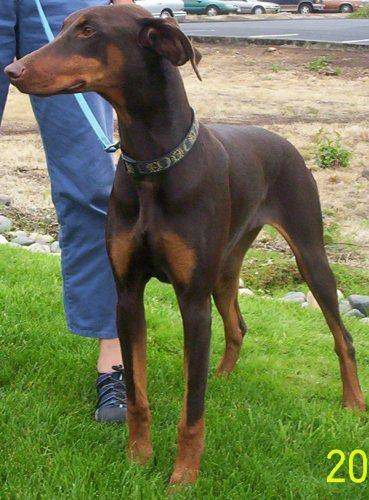

In [11]:
random.seed(42) 

image_path_list= glob.glob(f"{image_path}/*/*/*.jpg")

random_image_path = random.choice(image_path_list)

image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [12]:
new_width = 128
new_height = 128
new_size = (new_width, new_height)

data_transform = transforms.Compose([
    # Resize the images to IMAGE_SIZE xIMAGE_SIZE 
    transforms.Resize(size=new_size),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])


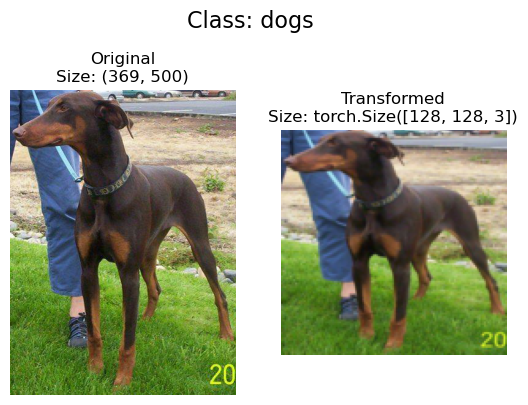

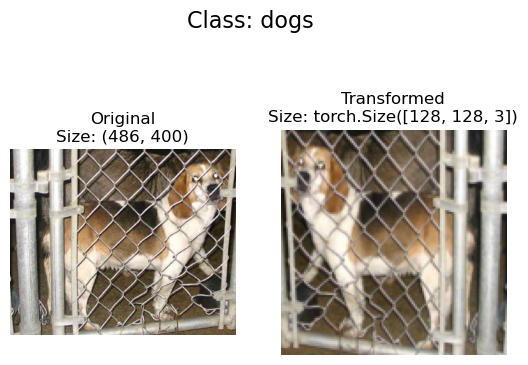

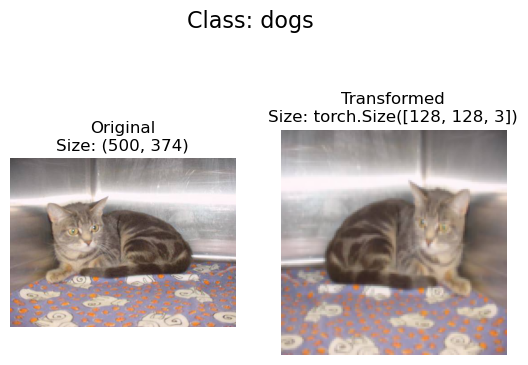

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [17]:
# Creating the training set
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)
#Creating the test set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 8005
    Root location: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2023
    Root location: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [18]:
# Get class names as a list
class_names = train_data.classes
print("Class names: ",class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Check the lengths
print("The lengths of the training and test sets: ", len(train_data), len(test_data))

Class names:  ['cats', 'dogs']
Class names as a dict:  {'cats': 0, 'dogs': 1}
The lengths of the training and test sets:  8005 2023
